In [1]:
#IMPORTING DATASET(.CSV) INTO PANDAS DATAFRAME
import alt as alt
import pandas as pd

dataset1 = pd.read_csv('01_april_30_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')
dataset1.columns = map(str.upper, dataset1.columns)

dataset2 = pd.read_csv('02_May_12_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')

dataset3 = pd.read_csv('03_june_9_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')
dataset3.columns = map(str.upper, dataset3.columns)

#Selected Features
selected_features = ['SOC1','SOC2A','SOC2B','SOC3A','SOC3B','SOC4A','SOC4B',
                      'SOC5A','SOC5B','SOC5C','SOC5D','SOC5E',
                      'PHYS1A','PHYS1B','PHYS1C','PHYS1D','PHYS1E','PHYS1F','PHYS1G','PHYS1H','PHYS1I','PHYS1J','PHYS1K','PHYS1L','PHYS1M','PHYS1N','PHYS1O','PHYS1P','PHYS1Q',
                      'PHYS2_1','PHYS2_2','PHYS2_3','PHYS2_4','PHYS2_5','PHYS2_6','PHYS2_7','PHYS2_8','PHYS2_9','PHYS2_10','PHYS2_11','PHYS2_12','PHYS2_13','PHYS2_14','PHYS2_15','PHYS2_16','PHYS2_17','PHYS2_18','PHYS2_19',
                      'PHYS7_1','PHYS7_2','PHYS7_3','PHYS7_4',
                      'PHYS8',
                      'PHYS10A','PHYS10B','PHYS10C','PHYS10D','PHYS10E',
                      'AGE7','GENDER','RACETH','ECON4A','ECON4B','HHINCOME','EDUCATION','HHSIZE1','HH_BANNER',
                      ]


df1 = dataset1[selected_features]
df1.dropna(inplace=True)
df2 = dataset2[selected_features]
df2.dropna(inplace=True)
df3 = dataset3[selected_features]
df3.dropna(inplace=True)

df = df1.append(df2,ignore_index = True).append(df3,ignore_index = True)
# df.isna().sum()

#Exporting Selected Features from datasets
from pathlib import Path

filepath1 = Path('C:\python\df1.csv')
filepath1.parent.mkdir(parents=True, exist_ok=True)
df1.to_csv(filepath1)

filepath2 = Path('C:\python\df2.csv')
filepath2.parent.mkdir(parents=True, exist_ok=True)
df2.to_csv(filepath2)

filepath3 = Path('C:\python\df3.csv')
filepath3.parent.mkdir(parents=True, exist_ok=True)
df3.to_csv(filepath3)

filepath = Path('C:\python\df.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_16560\919149335.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_16560\919149335.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_16560\919149335.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)
C:\User

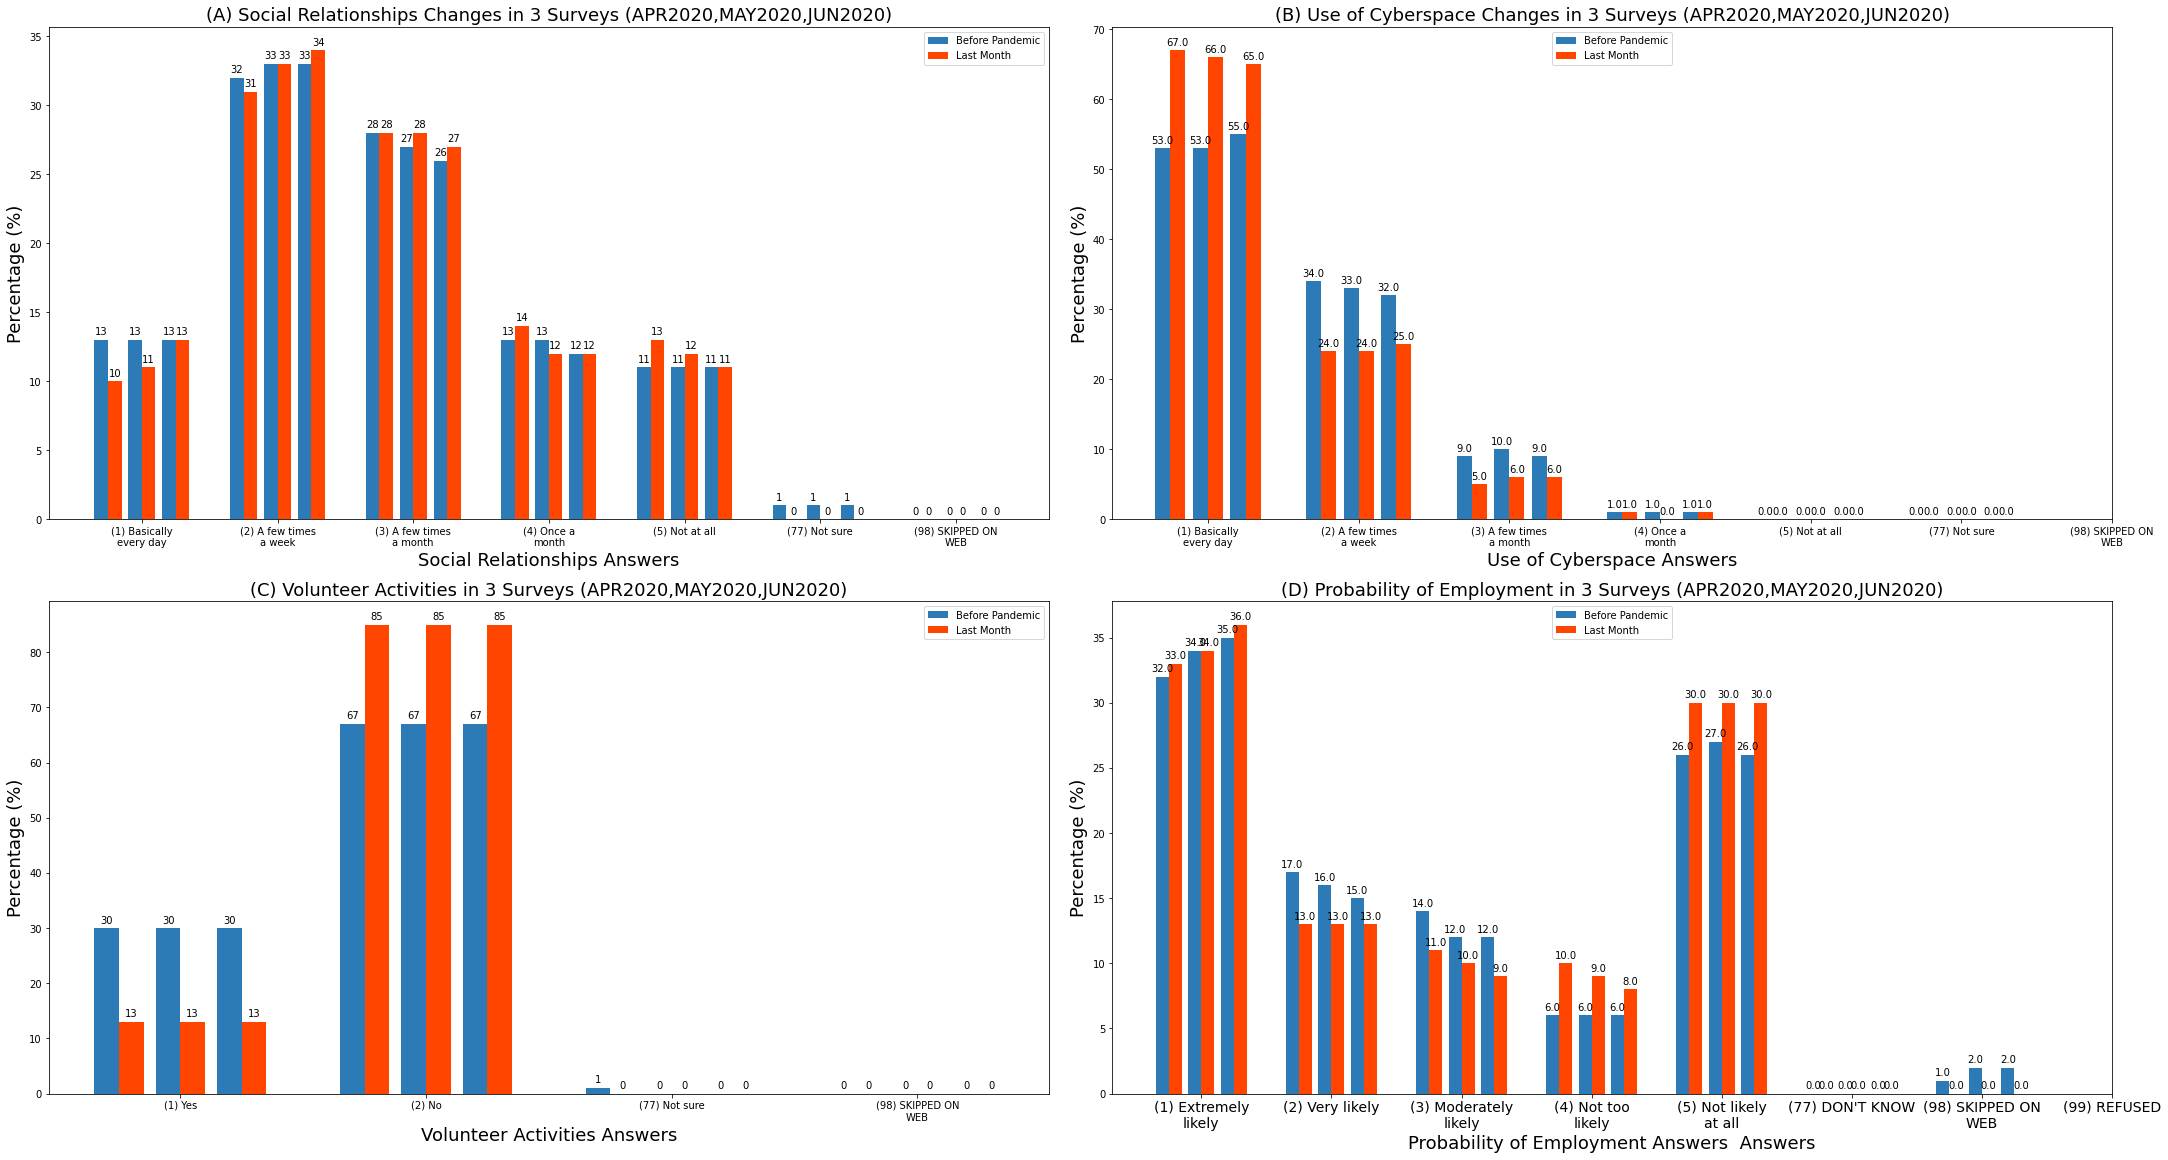

In [24]:
import textwrap
import matplotlib.pyplot as plt
import numpy as np

se1_1=df1[['SOC2B','SOC2A']]

se1_apr = df1[['SOC2B','SOC2A']]

data1B=se1_1['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se1_1['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_2=df2[['SOC2B','SOC2A']]
data2B=se1_2['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se1_2['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_3=df3[['SOC2B','SOC2A']]
data3B=se1_3['SOC2B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se1_3['SOC2A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1 = pd.concat([data1B,data1A['april_after'],data2B['may_before'],data2A['may_after'],data3B['june_before'],data3A['june_after']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)
x= data1.iloc[: , 1:]*100
x= x.astype(float).astype(int)
data1 = pd.concat([data1B['unique_values'],x], axis = 1)

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2,constrained_layout=True,figsize=(30, 16))


labels = data1['unique_values']
APR_BEFORE_PANDEMIC = data1['april_before']
APR_LAST_MONTH = data1['april_after']
MAY_BEFORE_PANDEMIC = data1['may_before']
MAY_LAST_MONTH = data1['may_after']
JUN_BEFORE_PANDEMIC = data1['june_before']
JUN_LAST_MONTH = data1['june_after']


def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars



# ax1 = plt.subplot(2,2,1)
rects1_1 = ax1.bar(x - width*3 , APR_BEFORE_PANDEMIC, width,color='#2C7BB6', label='Before Pandemic')
rects1_2 = ax1.bar(x - width*2, APR_LAST_MONTH, width,color='#FF4500', label='Last Month')
rects1_3 = ax1.bar(x - width/2 , MAY_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects1_4 = ax1.bar(x + width/2, MAY_LAST_MONTH, width,color='#FF4500')
rects1_5 = ax1.bar(x + width*2, JUN_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects1_6 = ax1.bar(x + width*3, JUN_LAST_MONTH, width,color='#FF4500')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Percentage (%)',fontsize=18)
ax1.set_xlabel('Social Relationships Answers',fontsize=18)
ax1.set_title('(A) Social Relationships Changes in 3 Surveys (APR2020,MAY2020,JUN2020)',fontsize=18)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1_1)
autolabel(rects1_2)
autolabel(rects1_3)
autolabel(rects1_4)
autolabel(rects1_5)
autolabel(rects1_6)
wrap_labels(ax1, 15)
# fig1 = plt.subplot(2,2,1)
# fig1.tight_layout()
plt.xticks(fontsize=14)
# plt.xticks(fontsize=7 , rotation=45)
# plt.show()


se1_1=df1[['SOC3B','SOC3A']]


data1B=se1_1['SOC3B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se1_1['SOC3A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_2=df2[['SOC3B','SOC3A']]
data2B=se1_2['SOC3B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se1_2['SOC3A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_3=df3[['SOC3B','SOC3A']]
data3B=se1_3['SOC3B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se1_3['SOC3A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1 = pd.concat([data1B,data1A['april_after'],data2B['may_before'],data2A['may_after'],data3B['june_before'],data3A['june_after']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)

x= data1.iloc[: , 1:]*100
x= x.astype(float).astype(int)
# x=int(x)
# df['col'] = df['col'].str.split('.').str[0]
# x.astype(int)
data1 = pd.concat([data1B['unique_values'],x], axis = 1)




labels = data1['unique_values']
APR_BEFORE_PANDEMIC = data1['april_before']
APR_LAST_MONTH = data1['april_after']
MAY_BEFORE_PANDEMIC = data1['may_before']
MAY_LAST_MONTH = data1['may_after']
JUN_BEFORE_PANDEMIC = data1['june_before']
JUN_LAST_MONTH = data1['june_after']


def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars



# ax1 = plt.subplot(2,2,1)
rects2_1 = ax2.bar(x - width*3 , APR_BEFORE_PANDEMIC, width,color='#2C7BB6', label='Before Pandemic')
rects2_2 = ax2.bar(x - width*2, APR_LAST_MONTH, width,color='#FF4500', label='Last Month')
rects2_3 = ax2.bar(x - width/2 , MAY_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects2_4 = ax2.bar(x + width/2, MAY_LAST_MONTH, width,color='#FF4500')
rects2_5 = ax2.bar(x + width*2, JUN_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects2_6 = ax2.bar(x + width*3, JUN_LAST_MONTH, width,color='#FF4500')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Percentage (%)',fontsize=18)
ax2.set_xlabel('Use of Cyberspace Answers',fontsize=18)
ax2.set_title('(B) Use of Cyberspace Changes in 3 Surveys (APR2020,MAY2020,JUN2020)',fontsize=18)
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects2_1)
autolabel(rects2_2)
autolabel(rects2_3)
autolabel(rects2_4)
autolabel(rects2_5)
autolabel(rects2_6)
wrap_labels(ax2, 15)
# fig1 = plt.subplot(2,2,1)
# fig1.tight_layout()
plt.xticks(fontsize=14)
# plt.xticks(fontsize=7 , rotation=45)
# plt.show()


# se1_1=df1[['SOC3B','SOC3A']]
#
#
# data1B=se1_1['SOC3B'].value_counts(normalize=True)\
#     .rename_axis('unique_values')\
#     .reset_index(name='april_before')\
#     .sort_values('unique_values')\
#     .reset_index(drop=True)
#
# data1A=se1_1['SOC3A'].value_counts(normalize=True)\
#     .rename_axis('unique_values')\
#     .reset_index(name='april_after')\
#     .sort_values('unique_values')\
#     .reset_index(drop=True)
#
# se1_2=df2[['SOC3B','SOC3A']]
# data2B=se1_2['SOC3B'].value_counts(normalize=True)\
#     .rename_axis('unique_values')\
#     .reset_index(name='may_before')\
#     .sort_values('unique_values')\
#     .reset_index(drop=True)
# data2A=se1_2['SOC3A'].value_counts(normalize=True)\
#     .rename_axis('unique_values')\
#     .reset_index(name='may_after')\
#     .sort_values('unique_values')\
#     .reset_index(drop=True)
#
# se1_3=df3[['SOC3B','SOC3A']]
# data3B=se1_3['SOC3B'].value_counts(normalize=True)\
#     .rename_axis('unique_values')\
#     .reset_index(name='june_before')\
#     .sort_values('unique_values')\
#     .reset_index(drop=True)
# data3A=se1_3['SOC3A'].value_counts(normalize=True)\
#     .rename_axis('unique_values')\
#     .reset_index(name='june_after')\
#     .sort_values('unique_values')\
#     .reset_index(drop=True)
#
# data1 = pd.concat([data1B,data1A['april_after'],data2B['may_before'],data2A['may_after'],data3B['june_before'],data3A['june_after']], axis = 1)
# data1.drop(data1.tail(1).index,inplace=True)
#
# x= data1.iloc[: , 1:]*100
# x= x.astype(float).astype(int)
# # x=int(x)
# # df['col'] = df['col'].str.split('.').str[0]
# # x.astype(int)
# data1 = pd.concat([data1B['unique_values'],x], axis = 1)
#
#
# import matplotlib.pyplot as plt
# import numpy as np
#
# labels = data1['unique_values']
# APR_BEFORE_PANDEMIC = data1['april_before']
# APR_LAST_MONTH = data1['april_after']
# MAY_BEFORE_PANDEMIC = data1['may_before']
# MAY_LAST_MONTH = data1['may_after']
# JUN_BEFORE_PANDEMIC = data1['june_before']
# JUN_LAST_MONTH = data1['june_after']
#
# def wrap_labels(ax, width, break_long_words=False):
#     labels = []
#     for label in ax.get_xticklabels():
#         text = label.get_text()
#         labels.append(textwrap.fill(text, width=width,
#                       break_long_words=break_long_words))
#     ax.set_xticklabels(labels, rotation=0)
#
# x = np.arange(len(labels))  # the label locations
# width = 0.1  # the width of the bars
#
#
# # fig2, ax = plt.subplots(figsize=(15, 8))
# rects1 = ax2.bar(x - width*3 , APR_BEFORE_PANDEMIC, width,color='#2C7BB6', label='Before Pandemic')
# rects2 = ax2.bar(x - width*2, APR_LAST_MONTH, width,color='#FF4500', label='Last Month')
# rects3 = ax2.bar(x - width/2 , MAY_BEFORE_PANDEMIC, width,color='#2C7BB6')
# rects4 = ax2.bar(x + width/2, MAY_LAST_MONTH, width,color='#FF4500')
# rects5 = ax2.bar(x + width*2, JUN_BEFORE_PANDEMIC, width,color='#2C7BB6')
# rects6 = ax2.bar(x + width*3, JUN_LAST_MONTH, width,color='#FF4500')
#
#
# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax2.set_ylabel('Percentage (%)',fontsize=18)
# ax2.set_xlabel('Use of Cyberspace Answers',fontsize=18)
# ax2.set_title('Use of Cyberspace Changes in 3 Surveys (APR2020,MAY2020,JUN2020)',fontsize=18)
# ax2.set_xticks(x)
# ax2.set_xticklabels(labels)
# ax2.legend()
#
#
# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax2.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')
#
#
# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)
# autolabel(rects4)
# autolabel(rects5)
# autolabel(rects6)
# wrap_labels(ax2, 15)
#
# # fig2.tight_layout()
# plt.xticks(fontsize=14)
# # plt.xticks(fontsize=7 , rotation=45)
# plt.show()

# fig.savefig('C:\python\SE03-BARS.png',format='jpeg', dpi=300)

# fig.savefig('C:\python\SE03-BARS.png',format='jpeg', dpi=300)


se1_1=df1[['SOC4B','SOC4A']]


data1B=se1_1['SOC4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se1_1['SOC4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_2=df2[['SOC4B','SOC4A']]
data2B=se1_2['SOC4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se1_2['SOC4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_3=df3[['SOC4B','SOC4A']]
data3B=se1_3['SOC4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se1_3['SOC4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1 = pd.concat([data1B,data1A['april_after'],data2B['may_before'],data2A['may_after'],data3B['june_before'],data3A['june_after']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)

x= data1.iloc[: , 1:]*100
x= x.astype(float).astype(int)
# x=int(x)
# df['col'] = df['col'].str.split('.').str[0]
# x.astype(int)
data1 = pd.concat([data1B['unique_values'],x], axis = 1)


import matplotlib.pyplot as plt
import numpy as np

labels = data1['unique_values']
APR_BEFORE_PANDEMIC = data1['april_before']
APR_LAST_MONTH = data1['april_after']
MAY_BEFORE_PANDEMIC = data1['may_before']
MAY_LAST_MONTH = data1['may_after']
JUN_BEFORE_PANDEMIC = data1['june_before']
JUN_LAST_MONTH = data1['june_after']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

# fig3, ax = plt.subplots(figsize=(15, 8))
rects3_1 = ax3.bar(x - width*3 , APR_BEFORE_PANDEMIC, width,color='#2C7BB6', label='Before Pandemic')
rects3_2 = ax3.bar(x - width*2, APR_LAST_MONTH, width,color='#FF4500', label='Last Month')
rects3_3 = ax3.bar(x - width/2 , MAY_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects3_4 = ax3.bar(x + width/2, MAY_LAST_MONTH, width,color='#FF4500')
rects3_5 = ax3.bar(x + width*2, JUN_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects3_6 = ax3.bar(x + width*3, JUN_LAST_MONTH, width,color='#FF4500')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax3.set_ylabel('Percentage (%)',fontsize=18)
ax3.set_xlabel('Volunteer Activities Answers',fontsize=18)
ax3.set_title('(C) Volunteer Activities in 3 Surveys (APR2020,MAY2020,JUN2020)',fontsize=18)
ax3.set_xticks(x)
ax3.set_xticklabels(labels)
ax3.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax3.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects3_1)
autolabel(rects3_2)
autolabel(rects3_3)
autolabel(rects3_4)
autolabel(rects3_5)
autolabel(rects3_6)
wrap_labels(ax3, 15)

# fig3.tight_layout()
plt.xticks(fontsize=14)
# plt.xticks(fontsize=7 , rotation=45)
# plt.show()


se1_1=df1[['ECON4B','ECON4A']]


data1B=se1_1['ECON4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se1_1['ECON4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_2=df2[['ECON4B','ECON4A']]
data2B=se1_2['ECON4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se1_2['ECON4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_3=df3[['ECON4B','ECON4A']]
data3B=se1_3['ECON4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se1_3['ECON4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1 = pd.concat([data1B,data1A['april_after'],data2B['may_before'],data2A['may_after'],data3B['june_before'],data3A['june_after']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)

x= data1.iloc[: , 1:]*100
x= x.astype(float).astype(int)
# x=int(x)
# df['col'] = df['col'].str.split('.').str[0]
# x.astype(int)
data1 = pd.concat([data1B['unique_values'],x], axis = 1)


import matplotlib.pyplot as plt
import numpy as np

labels = data1['unique_values']
APR_BEFORE_PANDEMIC = data1['april_before']
APR_LAST_MONTH = data1['april_after']
MAY_BEFORE_PANDEMIC = data1['may_before']
MAY_LAST_MONTH = data1['may_after']
JUN_BEFORE_PANDEMIC = data1['june_before']
JUN_LAST_MONTH = data1['june_after']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

# fig4, ax = plt.subplots(figsize=(15, 8))
rects4_1 = ax4.bar(x - width*3 , APR_BEFORE_PANDEMIC, width,color='#2C7BB6', label='Before Pandemic')
rects4_2 = ax4.bar(x - width*2, APR_LAST_MONTH, width,color='#FF4500', label='Last Month')
rects4_3 = ax4.bar(x - width/2 , MAY_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects4_4 = ax4.bar(x + width/2, MAY_LAST_MONTH, width,color='#FF4500')
rects4_5 = ax4.bar(x + width*2, JUN_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects4_6 = ax4.bar(x + width*3, JUN_LAST_MONTH, width,color='#FF4500')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax4.set_ylabel('Percentage (%)',fontsize=18)
ax4.set_xlabel('Probability of Employment Answers  Answers',fontsize=18)
ax4.set_title('(D) Probability of Employment in 3 Surveys (APR2020,MAY2020,JUN2020)',fontsize=18)
ax4.set_xticks(x)
ax4.set_xticklabels(labels)
ax4.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax4.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects4_1)
autolabel(rects4_2)
autolabel(rects4_3)
autolabel(rects4_4)
autolabel(rects4_5)
autolabel(rects4_6)
wrap_labels(ax4, 15)

# fig4.tight_layout()
plt.xticks(fontsize=14)
# plt.xticks(fontsize=7 , rotation=45)
# plt.show()

fig.savefig('C:\python\Hist.jpeg',format='jpeg', dpi=300)
# fig.savefig('C:\python\SE05-BARS.jpeg',format='jpeg', dpi=300)

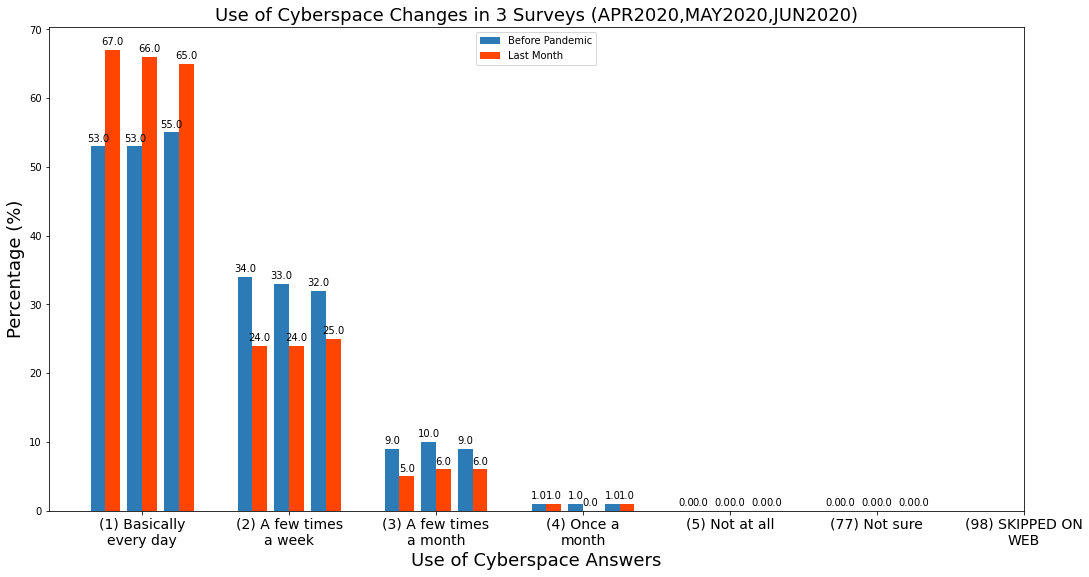

In [4]:
se1_1=df1[['SOC3B','SOC3A']]


data1B=se1_1['SOC3B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se1_1['SOC3A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_2=df2[['SOC3B','SOC3A']]
data2B=se1_2['SOC3B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se1_2['SOC3A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_3=df3[['SOC3B','SOC3A']]
data3B=se1_3['SOC3B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se1_3['SOC3A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1 = pd.concat([data1B,data1A['april_after'],data2B['may_before'],data2A['may_after'],data3B['june_before'],data3A['june_after']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)

x= data1.iloc[: , 1:]*100
x= x.astype(float).astype(int)
# x=int(x)
# df['col'] = df['col'].str.split('.').str[0]
# x.astype(int)
data1 = pd.concat([data1B['unique_values'],x], axis = 1)


import matplotlib.pyplot as plt
import numpy as np

labels = data1['unique_values']
APR_BEFORE_PANDEMIC = data1['april_before']
APR_LAST_MONTH = data1['april_after']
MAY_BEFORE_PANDEMIC = data1['may_before']
MAY_LAST_MONTH = data1['may_after']
JUN_BEFORE_PANDEMIC = data1['june_before']
JUN_LAST_MONTH = data1['june_after']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig2, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width*3 , APR_BEFORE_PANDEMIC, width,color='#2C7BB6', label='Before Pandemic')
rects2 = ax.bar(x - width*2, APR_LAST_MONTH, width,color='#FF4500', label='Last Month')
rects3 = ax.bar(x - width/2 , MAY_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects4 = ax.bar(x + width/2, MAY_LAST_MONTH, width,color='#FF4500')
rects5 = ax.bar(x + width*2, JUN_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects6 = ax.bar(x + width*3, JUN_LAST_MONTH, width,color='#FF4500')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage (%)',fontsize=18)
ax.set_xlabel('Use of Cyberspace Answers',fontsize=18)
ax.set_title('Use of Cyberspace Changes in 3 Surveys (APR2020,MAY2020,JUN2020)',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
wrap_labels(ax, 15)

fig2.tight_layout()
plt.xticks(fontsize=14)
# plt.xticks(fontsize=7 , rotation=45)
plt.show()

# fig.savefig('C:\python\SE03-BARS.png',format='jpeg', dpi=300)

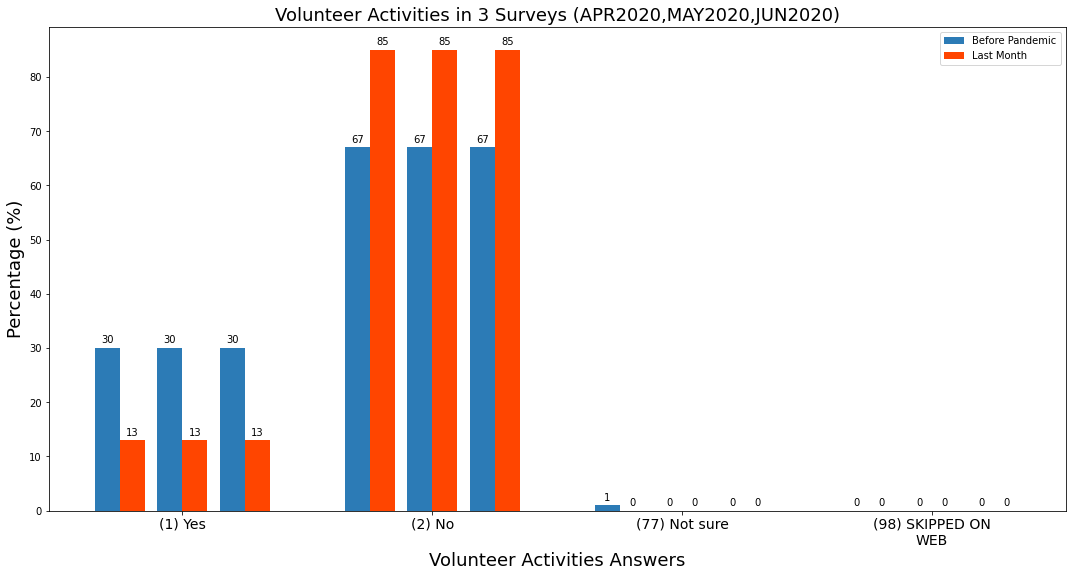

In [5]:
se1_1=df1[['SOC4B','SOC4A']]


data1B=se1_1['SOC4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se1_1['SOC4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_2=df2[['SOC4B','SOC4A']]
data2B=se1_2['SOC4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se1_2['SOC4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_3=df3[['SOC4B','SOC4A']]
data3B=se1_3['SOC4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se1_3['SOC4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1 = pd.concat([data1B,data1A['april_after'],data2B['may_before'],data2A['may_after'],data3B['june_before'],data3A['june_after']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)

x= data1.iloc[: , 1:]*100
x= x.astype(float).astype(int)
# x=int(x)
# df['col'] = df['col'].str.split('.').str[0]
# x.astype(int)
data1 = pd.concat([data1B['unique_values'],x], axis = 1)


import matplotlib.pyplot as plt
import numpy as np

labels = data1['unique_values']
APR_BEFORE_PANDEMIC = data1['april_before']
APR_LAST_MONTH = data1['april_after']
MAY_BEFORE_PANDEMIC = data1['may_before']
MAY_LAST_MONTH = data1['may_after']
JUN_BEFORE_PANDEMIC = data1['june_before']
JUN_LAST_MONTH = data1['june_after']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig3, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width*3 , APR_BEFORE_PANDEMIC, width,color='#2C7BB6', label='Before Pandemic')
rects2 = ax.bar(x - width*2, APR_LAST_MONTH, width,color='#FF4500', label='Last Month')
rects3 = ax.bar(x - width/2 , MAY_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects4 = ax.bar(x + width/2, MAY_LAST_MONTH, width,color='#FF4500')
rects5 = ax.bar(x + width*2, JUN_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects6 = ax.bar(x + width*3, JUN_LAST_MONTH, width,color='#FF4500')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage (%)',fontsize=18)
ax.set_xlabel('Volunteer Activities Answers',fontsize=18)
ax.set_title('Volunteer Activities in 3 Surveys (APR2020,MAY2020,JUN2020)',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
wrap_labels(ax, 15)

fig3.tight_layout()
plt.xticks(fontsize=14)
# plt.xticks(fontsize=7 , rotation=45)
plt.show()

# fig.savefig('C:\python\SE05-BARS.jpeg',format='jpeg', dpi=300)

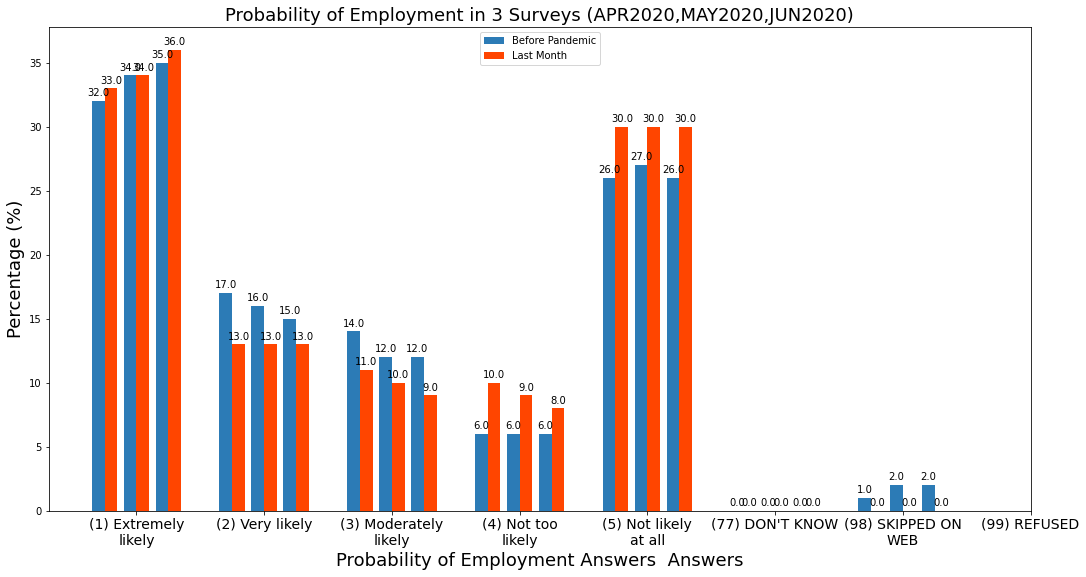

In [6]:
se1_1=df1[['ECON4B','ECON4A']]


data1B=se1_1['ECON4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se1_1['ECON4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_2=df2[['ECON4B','ECON4A']]
data2B=se1_2['ECON4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se1_2['ECON4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_3=df3[['ECON4B','ECON4A']]
data3B=se1_3['ECON4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se1_3['ECON4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1 = pd.concat([data1B,data1A['april_after'],data2B['may_before'],data2A['may_after'],data3B['june_before'],data3A['june_after']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)

x= data1.iloc[: , 1:]*100
x= x.astype(float).astype(int)
# x=int(x)
# df['col'] = df['col'].str.split('.').str[0]
# x.astype(int)
data1 = pd.concat([data1B['unique_values'],x], axis = 1)


import matplotlib.pyplot as plt
import numpy as np

labels = data1['unique_values']
APR_BEFORE_PANDEMIC = data1['april_before']
APR_LAST_MONTH = data1['april_after']
MAY_BEFORE_PANDEMIC = data1['may_before']
MAY_LAST_MONTH = data1['may_after']
JUN_BEFORE_PANDEMIC = data1['june_before']
JUN_LAST_MONTH = data1['june_after']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig4, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width*3 , APR_BEFORE_PANDEMIC, width,color='#2C7BB6', label='Before Pandemic')
rects2 = ax.bar(x - width*2, APR_LAST_MONTH, width,color='#FF4500', label='Last Month')
rects3 = ax.bar(x - width/2 , MAY_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects4 = ax.bar(x + width/2, MAY_LAST_MONTH, width,color='#FF4500')
rects5 = ax.bar(x + width*2, JUN_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects6 = ax.bar(x + width*3, JUN_LAST_MONTH, width,color='#FF4500')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage (%)',fontsize=18)
ax.set_xlabel('Probability of Employment Answers  Answers',fontsize=18)
ax.set_title('Probability of Employment in 3 Surveys (APR2020,MAY2020,JUN2020)',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
wrap_labels(ax, 15)

fig4.tight_layout()
plt.xticks(fontsize=14)
# plt.xticks(fontsize=7 , rotation=45)
plt.show()

# fig.savefig('C:\python\SE07-BARS.jpeg',format='jpeg', dpi=300)

In [7]:
from matplotlib import gridspec

fig5 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig5)
f2_ax1 = fig1.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig3.add_subplot(spec2[1, 0])
f2_ax4 = fig4.add_subplot(spec2[1, 1])

<Figure size 432x288 with 0 Axes>

TypeError: float() argument must be a string or a number, not 'Figure'

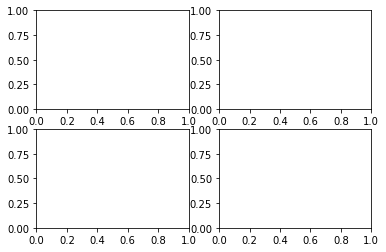

In [8]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(fig1)
# axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(fig2)
# axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(fig3)
# axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(fig4)
# axs[1, 1].set_title('Axis [1, 1]')
fig

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title("main")
axs[1, 0].plot(x, y**2)
axs[1, 0].set_title("shares x with main")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(x + 1, y + 1)
axs[0, 1].set_title("unrelated")
axs[1, 1].plot(x + 2, y + 2)
axs[1, 1].set_title("also unrelated")
fig.tight_layout()

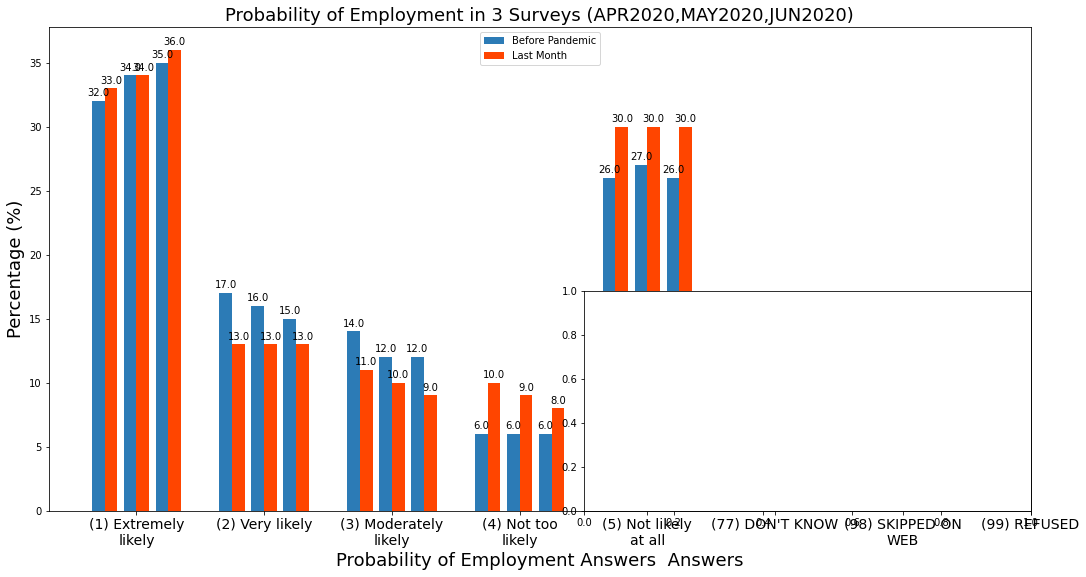

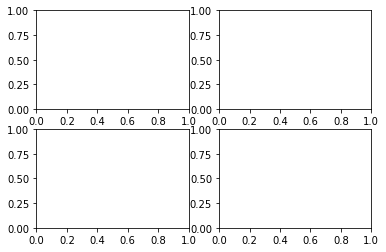

In [9]:
fig, axs = plt.subplots(2, 2)

plt.subplot(2,2,1)
fig1
plt.subplot(2,2,2)
fig2
plt.subplot(2,2,3)
fig3
plt.subplot(2,2,4)
fig4